In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv('npf_train.csv')
# shuffle
# df = df.sample(frac=1).reset_index(drop=True)

class2 = np.array(["event"]*df.shape[0],dtype="object")
class2[df["class4"]=="nonevent"] = "nonevent"
df["class2"] = class2
df["class2"] = df["class2"].astype("category")

not_needed_columns = ["partlybad", "id", "date"]
df = df.drop(not_needed_columns, axis=1)

In [207]:
class2_categories = {
    "nonevent": 0,
    "event": 1
}

class4_categories = {
    "nonevent": 0,
    "Ia": 1,
    "Ib": 2,
    "II": 3
}

def categorize_class2(row):
    row["class2"] = class2_categories[row["class2"]]
    
    return row
def categorize_class4(row):
    row["class4"] = class4_categories[row["class4"]]
    
    return row

df = df.apply(lambda row: categorize_class2(row), axis=1)
df = df.apply(lambda row: categorize_class4(row), axis=1)
df["class2"] = df["class2"].astype("category")
df["class4"] = df["class4"].astype("category")

In [208]:
df["class4"].unique()

[0, 2, 3, 1]
Categories (4, int64): [0, 2, 3, 1]

In [209]:
df.shape

(458, 102)

In [210]:
df.describe()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,...,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,380.996307,3.509202,381.014152,3.295570,381.906526,4.290148,380.913345,3.094905,193.287920,145.571635,...,6.311782,1.652786,6.898868,1.987094,10.961236,7.845917,0.451261,0.391348,0.003050,0.000659
std,10.897068,3.433711,10.878318,3.192464,10.482752,4.290241,10.900973,2.918037,126.058537,94.362871,...,9.680534,0.972092,9.744430,1.172087,6.633754,5.042478,0.319151,0.289645,0.002257,0.000572
min,356.526871,0.053968,356.796486,0.048990,359.795102,0.152663,356.841429,0.037417,3.719434,1.997962,...,-23.288234,0.066700,-22.659083,0.069879,0.295780,0.174813,0.005346,0.003261,0.000227,0.000027
25%,373.001701,1.085523,373.016258,1.016582,374.129292,1.222415,372.921420,1.004862,71.773357,54.867997,...,-1.298557,0.833480,-0.661579,0.888506,4.937496,2.890366,0.137491,0.103036,0.001500,0.000275
50%,380.102616,2.384334,380.101303,2.246497,380.973091,2.714247,380.113959,2.137779,197.939217,156.529795,...,7.320084,1.696258,7.917160,2.027125,11.702413,8.390743,0.438305,0.391399,0.002475,0.000491
75%,388.480984,4.956735,388.505367,4.645716,389.003091,6.286882,388.296775,4.376801,304.162015,230.776779,...,13.964999,2.359977,14.549644,2.878753,16.727710,12.289556,0.700794,0.623115,0.004176,0.000829
max,411.345970,20.960630,411.360294,19.351218,411.014925,27.656008,411.348676,17.384845,449.450545,309.124047,...,25.684185,5.124718,25.897075,5.422549,22.560576,16.692785,1.242857,1.074115,0.019094,0.003658


# Correlations

In [270]:
import pandas as pd

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10000):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [271]:
print("Top Correlations of features")
correlations = get_top_abs_correlations(df.drop(["class4", "class2"], axis=1), 10)
print(correlations)

Top Correlations of features
H2O336.mean  H2O504.mean    0.999952
H2O42.mean   H2O84.mean     0.999919
T504.mean    T672.mean      0.999911
H2O504.mean  H2O672.mean    0.999906
H2O168.mean  H2O336.mean    0.999905
T42.mean     T84.mean       0.999900
H2O168.mean  H2O84.mean     0.999895
T168.mean    T84.mean       0.999890
H2O336.mean  H2O672.mean    0.999798
T168.mean    T504.mean      0.999756
dtype: float64


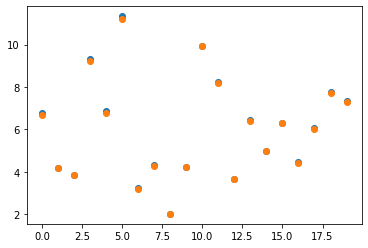

In [272]:
plt.scatter(df.index[0:20], df["H2O336.mean"][0:20])
plt.scatter(df.index[0:20], df["H2O504.mean"][0:20])

In [273]:
cor_matrix = df.drop(["class2", "class4"], axis=1).corr().abs()

In [274]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [275]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9995)]

In [276]:
df_corr_dropped = df.drop(to_drop, axis=1)

In [277]:
df_corr_dropped.head()

,class4,CO2168.mean,CO2168.std,CO2336.std,CO242.mean,CO242.std,CO2504.std,Glob.mean,Glob.std,H2O168.mean,...,T504.std,T672.std,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
0,2,368.569447,1.907326,1.769573,368.879787,2.199349,1.656756,349.232768,289.715680,6.833617,...,1.580886,1.547373,1.841738,18.457385,14.970213,0.777403,0.780244,0.001316,0.000335,1
1,0,379.155849,0.278232,0.277640,379.327358,0.357890,0.242220,7.997671,3.641173,4.228868,...,0.632072,0.654597,0.605836,0.781134,0.293010,0.015294,0.005811,0.000961,0.000194,0
2,2,380.272615,2.023509,2.000311,380.312645,2.009377,1.918547,251.177234,154.440721,3.872769,...,2.930674,2.892165,2.972621,14.093773,8.691394,0.381272,0.296800,0.002391,0.000379,1
3,3,368.388341,5.323841,4.408715,369.788478,7.029583,4.007155,195.883805,158.995377,9.503712,...,1.860020,1.772399,2.410785,11.695691,9.173489,0.425933,0.400514,0.005079,0.003658,1
4,2,369.227112,2.784930,2.666234,369.553830,3.026050,2.374363,300.482342,209.813142,6.979251,...,2.865687,2.741493,3.301227,17.217257,12.074647,0.653143,0.571984,0.002601,0.000645,1


# Test some models

In [283]:
df = df.sample(frac=1).reset_index(drop=True)

datasets = []
datasets.append(df)
datasets.append(df_corr_dropped)

In [284]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = []

model1 = {
    "model": svm.SVC(),
    "params": {
        "kernel":'linear', 
        "C":1, 
        "random_state":0
    }
}

models.append(model1)

model2 = {
    "model": LogisticRegression(),
    "params": {
        "random_state":0,
        "solver": 'lbfgs'
    }
}

models.append(model2)

model3 = {
    "model": DecisionTreeClassifier(),
    "params": {
        "random_state":0
    }
}

models.append(model3)

model4 = {
    "model": RandomForestClassifier(),
    "params": {
        "random_state":0
    }
}
models.append(model4)

model5 = {
    "model": KNeighborsClassifier(),
    "params": {
        "n_neighbors":10
    }
}
models.append(model5)

model6 = {
    "model": GaussianNB(),
    "params": {
    }
}
models.append(model6)

In [285]:
initial_result = {}
result_df = pd.DataFrame(data=initial_result)

y_col = "class2"
for dataset in datasets:
    X_cols = list(filter(lambda col: col != y_col and col != "class4", dataset.columns))
    train_set_length = int(round(len(dataset)*0.9, 0))
    
    X_train = dataset[X_cols][0:train_set_length]
    y_train = dataset[y_col][0:train_set_length]
    
    X_test = dataset[X_cols][train_set_length:len(dataset)]
    y_test = dataset[y_col][train_set_length:len(dataset)]
    
    for model in models[1:]:
        clf = model["model"]
        params = model["params"]
        clf.set_params(**params)
        
        scores = cross_val_score(clf, X_train, y_train, cv=2)
        cv_score = scores.mean()
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_true = y_test
        test_acc = accuracy_score(y_true, y_pred)
        
        new_result_row = { 
            "model": type(clf).__name__, 
            "model_params": params,
            "dataset_columns": list(X_train.columns), 
            "dataset_columns_length": len(list(X_train.columns)),
            "cv_acc": cv_score,
            "test_acc": test_acc
        }
        result_df = result_df.append(new_result_row, ignore_index=True)

C:\Users\ossij\anaconda3\envs\intro-ml\lib\site-packages\sklearn\linear_model\logistic.py:809: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ossij\anaconda3\envs\intro-ml\lib\site-packages\sklearn\linear_model\logistic.py:809: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ossij\anaconda3\envs\intro-ml\lib\site-packages\sklearn\linear_model\logistic.py:809: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ossij\anaconda3\envs\intro-ml\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ossij\anaconda3\envs\intro-ml\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The

In [286]:
result_df.sort_values(by='test_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params,test_acc
5,0.837379,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.847826
7,0.798544,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,RandomForestClassifier,{'random_state': 0},0.847826
0,0.854369,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.782609
2,0.854369,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,RandomForestClassifier,{'random_state': 0},0.782609
6,0.781553,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,DecisionTreeClassifier,{'random_state': 0},0.782609
3,0.759709,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,KNeighborsClassifier,{'n_neighbors': 10},0.739130
1,0.791262,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,DecisionTreeClassifier,{'random_state': 0},0.717391
8,0.781553,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,KNeighborsClassifier,{'n_neighbors': 10},0.717391
4,0.776699,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,GaussianNB,{},0.695652
9,0.754854,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,GaussianNB,{},0.695652


In [287]:
result_df.sort_values(by='cv_acc', ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,model,model_params,test_acc
0,0.854369,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.782609
2,0.854369,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,RandomForestClassifier,{'random_state': 0},0.782609
5,0.837379,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",0.847826
7,0.798544,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,RandomForestClassifier,{'random_state': 0},0.847826
1,0.791262,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,DecisionTreeClassifier,{'random_state': 0},0.717391
6,0.781553,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,DecisionTreeClassifier,{'random_state': 0},0.782609
8,0.781553,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,KNeighborsClassifier,{'n_neighbors': 10},0.717391
4,0.776699,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,GaussianNB,{},0.695652
3,0.759709,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,KNeighborsClassifier,{'n_neighbors': 10},0.739130
9,0.754854,"[CO2168.mean, CO2168.std, CO2336.std, CO242.me...",89.0,GaussianNB,{},0.695652
